# Deep Convolutional MNIST Classifier using Tensorflow

This is a convolutional nerual network with 11 conv-layer and 3 fc-layer base on VGG19, I removed 8 conv-layer and 3 pooling layer to make sure all datas fits in my GPU memory. The project is based on github project tensorflow-vgg19 [https://github.com/machrisaa/tensorflow-vgg]

based on https://github.com/EvanWY/Tensorflow-VGG-MNIST-Classifier

### Initialization
MNIST dataset is included in Tensorflow as an example dataset. I choise MNIST because it's relatively smaller and spending less time to train. It's good for practicing CNN and Tensorflow

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import utils
import vgg19_trainable2 as vgg19
from tensorflow.examples.tutorials.mnist import input_data
import time
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

/home/seung/kerasTF_python3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
sess = tf.Session()
batch_size = 300

images = tf.placeholder(tf.float32, [None, 28, 28, 1])
true_out = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool)

vgg = vgg19.Vgg19()
vgg.build(images, train_mode)

print(vgg.get_var_count())

4417786


### MNIST dataset
The MNIST dataset is a hand writen digit classification dataset.

(300, 28, 28, 1) (300, 10)
5
1
2
3


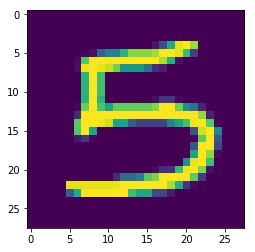

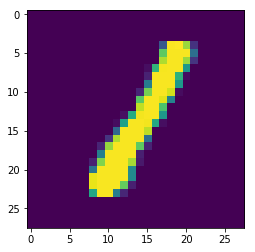

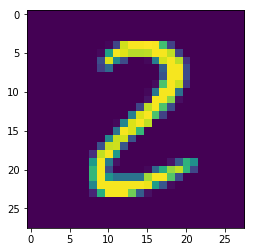

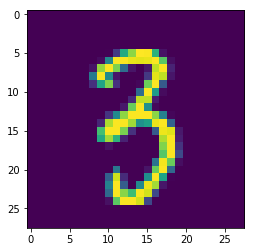

In [3]:
# test classification
sess.run(tf.global_variables_initializer())

batch = mnist.train.next_batch(batch_size)
batch_img = batch[0].reshape((-1,28,28,1))
batch_lbl = batch[1]

print(batch_img.shape, batch_lbl.shape)

print (np.argmax(batch_lbl[0]))
print (np.argmax(batch_lbl[1]))
print (np.argmax(batch_lbl[2]))
print (np.argmax(batch_lbl[3]))


plt.figure()
plt.imshow(batch_img[0,:,:,0])
plt.figure()
plt.imshow(batch_img[1,:,:,0])
plt.figure()
plt.imshow(batch_img[2,:,:,0])
plt.figure()
plt.imshow(batch_img[3,:,:,0])

### Define loss function and training process

In [4]:
cost = tf.reduce_sum((vgg.prob - true_out) ** 2)
train = tf.train.AdamOptimizer(0.001).minimize(cost)

correct_prediction = tf.equal(tf.argmax(vgg.prob, 1), tf.argmax(true_out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Accuracy Before Training
After randomization, all weights of the network is set to random value, so the prediction should be totally random. Because we have 10 digits in this dataset, the accuracy of prediction of random guess should be around 10%. In this case, the initialization has 14.4% of accuracy.

In [5]:
sess.run(tf.global_variables_initializer())

vbatch = mnist.validation.next_batch(500)
vbatch_img = vbatch[0].reshape((-1,28,28,1))
vbatch_lbl = vbatch[1]

print ('accuracy: ', sess.run(accuracy, feed_dict={images: vbatch_img, true_out: vbatch_lbl, train_mode: False}))

accuracy:  0.09


In [6]:
print(vgg.conv1_1)
print(vgg.conv1_2)
print(vgg.pool1)
print()
print(vgg.conv2_1)
print(vgg.conv2_2)
print(vgg.pool2)
print()
print(vgg.conv3_1)
print(vgg.conv3_2)
print(vgg.conv3_3)
print(vgg.conv3_4)
#print(vgg.pool3)

Tensor("conv1_1/Relu:0", shape=(?, 28, 28, 16), dtype=float32)
Tensor("conv1_2/Relu:0", shape=(?, 28, 28, 16), dtype=float32)
Tensor("pool1:0", shape=(?, 14, 14, 16), dtype=float32)

Tensor("conv2_1/Relu:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("conv2_2/Relu:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("pool2:0", shape=(?, 7, 7, 32), dtype=float32)

Tensor("conv3_1/Relu:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("conv3_2/Relu:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("conv3_3/Relu:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("conv3_4/Relu:0", shape=(?, 7, 7, 64), dtype=float32)


### Training
Within 100 iteration, the accuracy increase to 94.4% on validation data set.

In [7]:
velapsed=[]

for i in range(1000):
    batch = mnist.train.next_batch(batch_size)
    batch_img = batch[0].reshape((-1,28,28,1))
    batch_lbl = batch[1]
    t = time.time()
    sess.run(train, feed_dict={images: batch_img, true_out: batch_lbl, train_mode: True})
    elapsed = time.time() - t
    velapsed.append(elapsed)
    if i % 50 == 0:
        print( 'iteration: ', i)
        vbatch = mnist.validation.next_batch(500)
        vbatch_img = vbatch[0].reshape((-1,28,28,1))
        vbatch_lbl = vbatch[1]
        print ('accuracy (validation): ', sess.run(accuracy, feed_dict={images: vbatch_img, true_out: vbatch_lbl, train_mode: False}))

iteration:  0
accuracy (validation):  0.102
iteration:  50
accuracy (validation):  0.894
iteration:  100
accuracy (validation):  0.97
iteration:  150
accuracy (validation):  0.97
iteration:  200
accuracy (validation):  0.972
iteration:  250
accuracy (validation):  0.968
iteration:  300
accuracy (validation):  0.986
iteration:  350
accuracy (validation):  0.984
iteration:  400
accuracy (validation):  0.958
iteration:  450
accuracy (validation):  0.986
iteration:  500
accuracy (validation):  0.98
iteration:  550
accuracy (validation):  0.986
iteration:  600
accuracy (validation):  0.98
iteration:  650
accuracy (validation):  0.986
iteration:  700
accuracy (validation):  0.978
iteration:  750
accuracy (validation):  0.986
iteration:  800
accuracy (validation):  0.984
iteration:  850
accuracy (validation):  0.984
iteration:  900
accuracy (validation):  0.988
iteration:  950
accuracy (validation):  0.99


In [8]:
tmean = sum(velapsed) / float(len(velapsed))
print('Mean elapsed time : {}'.format(tmean))

Mean elapsed time : 0.4535353796482086


### Validation
After 1000 iterations, the accuracy on validation dataset increase to 98.75%. 

In [9]:
vbatch = mnist.validation.next_batch(2000)
vbatch_img = vbatch[0].reshape((-1,28,28,1))
vbatch_lbl = vbatch[1]
print(sess.run(accuracy, feed_dict={images: vbatch_img, true_out: vbatch_lbl, train_mode: False}))

0.9845


In [10]:
vbatch = mnist.train.next_batch(2000)
vbatch_img = vbatch[0].reshape((-1,28,28,1))
vbatch_lbl = vbatch[1]
print(sess.run(accuracy, feed_dict={images: vbatch_img, true_out: vbatch_lbl, train_mode: False}))

0.9855
